In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [76]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [77]:
df = pd.read_csv("/content/drive/MyDrive/Food_ingredient_dataset/df_filtered.csv")

### In this dataset (df_filtered.csv), we have extracted the ingredient names from the columns before using an ingredient parser library (pying). We have also removed the rows where nan values were present and have removed those rows as well where hindi letters were present in TranslatedIngredients column

In [78]:
df.head(2)

,Unnamed: 0,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","['gourd', 'salt', 'onion', 'flour', 'turmeric ...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","['rice cooked', 'tomatoes', 'belle', 'salt', '...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...


### Since this task is complex, for simplicity, we are going to group output column (PrepTimeInMins) into 3 classes :- 'low', 'medium', 'long'. Here 'low' is preptime less than 30 mins, 'medium' is preptime in between 30 and 60 mins (inclusively) and 'long' is preptime greater than 60 mins.

In [79]:
for i in range(len(df)):
  if int(df['PrepTimeInMins'][i]) < 30:
    df['PrepTimeInMins'][i] = 'low'
  elif 30<=int(df['PrepTimeInMins'][i])<=60:
    df['PrepTimeInMins'][i] = 'medium'
  else:
    df['PrepTimeInMins'][i] = 'long'

<ipython-input-79-6f01f19a4602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrepTimeInMins'][i] = 'low'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Below, we are going to count the frequency of each ingredient to check their relevancy in a recipe

In [80]:
# frequency of ingredients dictionary
d = {}
for i in range(len(df)):
  l = eval(df['TranslatedIngredients'][i])
  for ingred in l:
    if ingred in d:
      d[ingred] += 1
    else:
      d[ingred] = 1

In [81]:
print(len(d))

3570


### So, the total number of ingredients in our dataset is 3750

In [82]:
arr = sorted(d.items(), key = lambda elem: (elem[1]))[::-1]

### Below we have listed the 50 most frequent ingredients along with their frequencies

In [83]:
arr[:50]

[('salt', 5407),
 ('sunflower oil', 2449),
 ('garlic', 1971),
 ('onion', 1941),
 ('red chilli powder', 1879),
 ('turmeric powder', 1779),
 ('cumin seeds', 1525),
 ('ginger', 1471),
 ('green chillies', 1384),
 ('curry leaves', 1244),
 ('coriander', 1220),
 ('sugar', 1213),
 ('water', 1194),
 ('mustard seeds', 1098),
 ('ghee', 972),
 ('coriander powder', 899),
 ('black pepper powder', 855),
 ('garam masala powder', 836),
 ('lemon juice', 836),
 ('coconut', 795),
 ('cumin powder', 756),
 ('red chillies', 736),
 ('extra virgin olive oil', 682),
 ('', 622),
 ('milk', 616),
 ('tomato', 605),
 ('onions', 528),
 ('tomatoes', 527),
 ('butter', 513),
 ('cardamom', 497),
 ('turmeric powder haldi', 491),
 ('asafoetida hing', 490),
 ('black peppercorns', 482),
 ('all purpose flour', 476),
 ('curd dahi yogurt', 461),
 ('cloves', 440),
 ('cinnamon stick', 433),
 ('coriander dhania', 406),
 ('asafoetida', 401),
 ('white urad', 385),
 ('flour', 381),
 ('mint leaves', 371),
 ('jaggery', 366),
 ('bay lea

### Now, we will show a bar graph for the top 500 most frequent ingredients

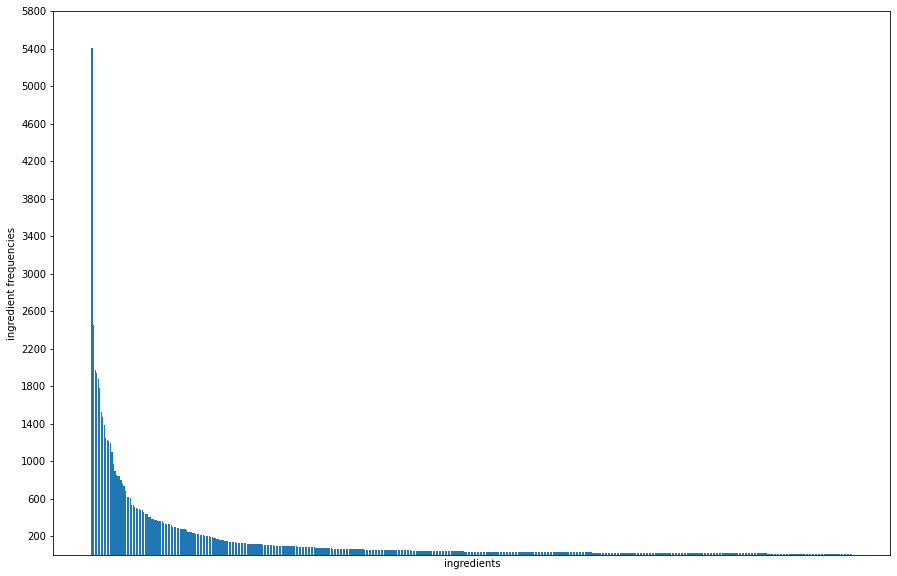

In [84]:
x_axis = []
y_axis = []
for i in range(500):
  x_axis.append(arr[i][0])
  y_axis.append(arr[i][1])

fig = plt.figure(figsize = (15, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('ingredients')
plt.ylabel('ingredient frequencies')
plt.xticks([])
plt.yticks([tick for tick in range(200,6000,400)])
plt.show()

### The above bar graph only has the top 500 ingredients. From the ferequency bar graph, it is evident that there are a lot of ingredients that are barely the part of recipes (appear lot less frequently in them). We may exclude them from our dataset as they are less important and not very much reflective of the data. (Including them may increase more noise and decrease accuracy, as well as increase the time taken to train model as a training data with more than 3000 columns takes quite a lot time to train). So, for this task, we will currently choose the top 300 frequent ingredient from each of the low,medium and long classes. Doing this will give us a fair chance to predict each of the 3 classes equally

In [85]:
d1 = {}
d2 = {}
d3 = {}
for i in range(len(df)):
  l = eval(df['TranslatedIngredients'][i])
  for ingred in l:
    if df['PrepTimeInMins'][i] == 'low':
      if ingred in d1:
        d1[ingred] += 1
      else:
        d1[ingred] = 1
    elif df['PrepTimeInMins'][i] == 'medium':
      if ingred in d2:
        d2[ingred] += 1
      else:
        d2[ingred] = 1
    else:
      if ingred in d3:
        d3[ingred] += 1
      else:
        d3[ingred] = 1

In [86]:
arr1 = sorted(d1.items(), key = lambda elem: (elem[1]))[::-1]
arr2 = sorted(d2.items(), key = lambda elem: (elem[1]))[::-1]
arr3 = sorted(d3.items(), key = lambda elem: (elem[1]))[::-1]

In [87]:
s = set([arr1[i][0] for i in range(300)]).union(set([arr2[i][0] for i in range(300)])).union(set([arr3[i][0] for i in range(300)]))
all_ingreds = list(s)

### Below, we are going to create one-hot encoded vectors for the ingredients that we selected on the basis of frequencies

In [88]:
temp_df = pd.DataFrame(columns = all_ingreds)
for i in range(len(df)):
  l = eval(df['TranslatedIngredients'][i])
  temp_dic = {}
  for ingred in l:
    if ingred in temp_dic:
      temp_dic[ingred] += 1
    else:
      temp_dic[ingred] = 1
  temp_l = []
  for ingred in all_ingreds:
    if ingred not in temp_dic:
      temp_l.append(0)
    else:
      temp_l.append(temp_dic[ingred])
  temp_df = temp_df.append(pd.DataFrame([temp_l], columns = all_ingreds), ignore_index=True)

In [89]:
df2 = pd.concat([df, temp_df], axis=1, join='inner')
df2.drop(columns = ['Unnamed: 0', 'Srno', 'RecipeName', 'Ingredients', 'Cuisine', 'Course', 'Diet', 'Instructions', 'URL'], axis=1, inplace=True)

In [90]:
x1 = df2.drop(columns = ['TranslatedRecipeName', 'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins', 'TotalTimeInMins', 'TranslatedInstructions']).to_numpy()
sc = StandardScaler()
x1 = sc.fit_transform(x1)

### Now, we have to add the instructions in features. For that, we will tokenise the instructions(including removing stopwords and lemmatizing) with 'nltk' and create doc2vec vectors for instruction corresponding to each recipe. Doing this will factor in for the important phrases, processes and forms of the ingredient that are important to preparation time of recipe

In [91]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

### Below we are defining some functions to generate tokens from the instructions in a proper manner. First we are removing punctuations, then remove the stopwords and then finall lemmatizing them to group similar words as one.

In [92]:
def get_lower_case(text):
	return text.lower()

# this replaces the punctuations in a text with a space
def get_non_punctuated_words(text):
	output = ""
	for ch in text:
		if ch in punctuation:
			output += ' '
		else:
			output += ch
	return output

# this generates a tokenized list from a text
def get_tokenized_list(text):
	return word_tokenize(text)

# this removes the stopwords present in the list arr
def get_non_stopword_list(arr):
	# arr is tokenized already
	l = []
	for word in arr:
		if word not in stop_words:
			l.append(word)
	return l

# this lemmatizes the words present in the list arr
def get_lemmatized_wordlist(arr):
	# arr is tokenized already
	l = []
	for word in arr:
		l.append(lemmatizer.lemmatize(word))
	return l

def get_final_tokens(text):
  text = get_lower_case(text)
  text = get_non_punctuated_words(text)
  l = get_tokenized_list(text)
  l = get_non_stopword_list(l)
  l = get_lemmatized_wordlist(l)
  return l

In [93]:
tagged_data = []
for i, _d in enumerate(df['TranslatedInstructions']):
  tag = [str(i)]
  text = get_lower_case(_d)
  text = get_non_punctuated_words(text)
  l = get_tokenized_list(text)
  l = get_non_stopword_list(l)
  l = get_lemmatized_wordlist(l)
  tagged_data.append(TaggedDocument(words = l, tags = tag))

### Below is the process to convert the tokenized instructions into embedded vectors using doc2vec approach

In [94]:
data_for_training = tagged_data
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [95]:
column_list = ['vector'+str(i) for i in range(100)]
temp_df = pd.DataFrame(columns = column_list)
for i in range(len(df)):
  l = get_final_tokens(df['TranslatedInstructions'][i])
  temp_l = model.infer_vector(l)
  temp_df = temp_df.append(pd.DataFrame([temp_l], columns = column_list), ignore_index = True)

### Now after getting all the required features, we will start creating the models and see how much accuracy we can get

In [96]:
x2 = temp_df.to_numpy()
x = np.concatenate((x1,x2),axis=1)
y = df2['PrepTimeInMins'].to_numpy()

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [98]:
# a function to evaluate model
def evaluate_model(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion matrix:- ",cm)
  print("Accuracy score: ", accuracy_score(y_test, y_pred))
  print("Class-wise accuracies:- ",cm.diagonal()/cm.sum(axis=1))

In [99]:
clf = LogisticRegression(max_iter = 10000, C=10)
evaluate_model(clf, x_train, x_test, y_train, y_test)

Confusion matrix:-  [[  30   52    8]
 [  41 1225   63]
 [  11  114   26]]
Accuracy score:  0.8159235668789809
Class-wise accuracies:-  [0.33333333 0.92174567 0.17218543]


In [100]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
evaluate_model(clf, x_train, x_test, y_train, y_test)

Confusion matrix:-  [[   0   90    0]
 [   0 1329    0]
 [   0  151    0]]
Accuracy score:  0.8464968152866242
Class-wise accuracies:-  [0. 1. 0.]


In [101]:
clf = SVC(C = 10)
evaluate_model(clf, x_train, x_test, y_train, y_test)

Confusion matrix:-  [[  18   70    2]
 [   9 1308   12]
 [   2  141    8]]
Accuracy score:  0.8496815286624204
Class-wise accuracies:-  [0.2        0.98419865 0.05298013]


In [102]:
clf3 = MLPClassifier(max_iter = 2000, activation = 'tanh', alpha = 5)
evaluate_model(clf3, x_train, x_test, y_train, y_test)

Confusion matrix:-  [[  19   63    8]
 [   7 1293   29]
 [   2  132   17]]
Accuracy score:  0.8464968152866242
Class-wise accuracies:-  [0.21111111 0.97291196 0.11258278]


In [103]:
clf5 = KNeighborsClassifier()
evaluate_model(clf5, x_train, x_test, y_train, y_test)

Confusion matrix:-  [[  11   79    0]
 [  10 1312    7]
 [   2  147    2]]
Accuracy score:  0.8439490445859873
Class-wise accuracies:-  [0.12222222 0.98720843 0.01324503]


### We see that although the overall accuracy is high, however the class-wise accuracies are poor for 'medium' and 'long' classes. A possible reasoning for this is that the data is imbalanced. Let us check if the data points of the 3 classes are imbalanced or not.

### We can check that by see the frequencies of the 3 classes.

In [104]:
print("frequency of low:- ",(y=='low').sum())
print("frequency of medium:- ",(y=='medium').sum())
print("frequency of long:- ",(y=='long').sum())

frequency of low:-  5320
frequency of medium:-  627
frequency of long:-  331


### Now we know that the data is imbalanced. So, we are going to use strategies to handle imbalanced data. Here, we are going to oversample the whole data training data. 

In [105]:
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [106]:
clf = LogisticRegression(max_iter = 10000, C=10)
evaluate_model(clf, x_train_res, x_test, y_train_res, y_test)

Confusion matrix:-  [[ 44  29  17]
 [114 962 253]
 [ 20  68  63]]
Accuracy score:  0.6808917197452229
Class-wise accuracies:-  [0.48888889 0.72385252 0.41721854]


In [107]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
evaluate_model(clf, x_train_res, x_test, y_train_res, y_test)

Confusion matrix:-  [[  14   74    2]
 [  11 1262   56]
 [   4  133   14]]
Accuracy score:  0.821656050955414
Class-wise accuracies:-  [0.15555556 0.94958616 0.09271523]


In [108]:
clf3 = MLPClassifier(max_iter = 2000, activation = 'tanh', alpha = 5)
evaluate_model(clf3, x_train_res, x_test, y_train_res, y_test)

Confusion matrix:-  [[  45   34   11]
 [ 104 1027  198]
 [  25   76   50]]
Accuracy score:  0.7146496815286624
Class-wise accuracies:-  [0.5        0.77276147 0.33112583]


In [109]:
clf5 = KNeighborsClassifier()
evaluate_model(clf5, x_train_res, x_test, y_train_res, y_test)

Confusion matrix:-  [[ 46  20  24]
 [230 689 410]
 [ 31  54  66]]
Accuracy score:  0.5101910828025478
Class-wise accuracies:-  [0.51111111 0.51843491 0.43708609]


In [110]:
clf = SVC(C = 10)
evaluate_model(clf, x_train_res, x_test, y_train_res, y_test)

Confusion matrix:-  [[  22   66    2]
 [  13 1283   33]
 [   2  139   10]]
Accuracy score:  0.8375796178343949
Class-wise accuracies:-  [0.24444444 0.96538751 0.06622517]


### Finally, we see that after oversampling the data points, the class-wise accuracy distribution of LogisticRegression, MLPClassifier and KNeighborsClassifier has improved. Among these 3, Logistic regression and K-neighbors have better class-wise accuracies. The overall accuracies of these 3 models are 71% for MLPClassifier, 68% for Logistic regression and 51% for KNeighborsClassifier. 
### With this, we can conclude this attempt to predict the preparation time of a recipe. Although we got descent accuracies, however, it is far from a standard model to be used and needs lot of improvement. 
### This task was difficult as both, the ingredients and instructions were given in paragraph forms and needed to be converted into vectors. One special part that needs improvement is converting instructions into numerical vectors. Right now we used doc2vec based model but there can be better models suited for this purpose. For further research, deep learning based models can also be applied for prediction which in general are showed to get better results.